In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=cc133e73ff6220c99560b782ff61325d9dfd4d4e46e68c0c9c870ea32e8f57ad
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups

#Here we are fetching the raw data from the 20newsgroup corpora. If no params are given, default shuffle is True.
raw_dataset = fetch_20newsgroups()
#print(raw_dataset)
print(raw_dataset.data[0])

num_documents = len(raw_dataset.data)
num_categories = len(raw_dataset.target_names)

print(f"num_documents:{num_documents}")
print(f"num_categories:{num_categories}")

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





num_documents:11314
num_categories:20


**Data Cleaning**

In [ ]:
#Subset(all) includes all the training and test set data.
#Filtering out the content to analyze the document
# shuffle=False to load the data in the order rather than loading in random order
# loading only useful data and removing un-necessary header etc..
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])

corpus = dataset.data
gnd_labels = dataset.target #Ground truth labels
print(len(corpus), len(gnd_labels))
print(type(corpus), type(gnd_labels))
print(gnd_labels)
print(dataset.target_names)


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
18846 18846
<class 'list'> <class 'numpy.ndarray'>
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


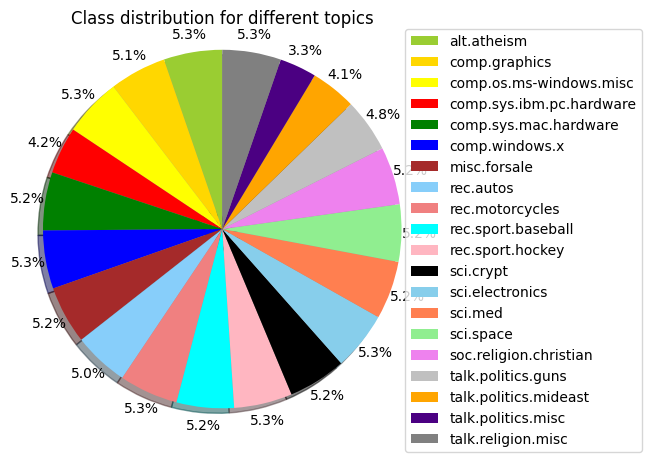

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
# Counter(labels)
label_20, values = zip(*Counter(gnd_labels).items())
indexes = np.arange(len(label_20))

# plot the labels
label_20 = dataset.target_names
val = values
colors = ['yellowgreen', 'gold', 'yellow', 'red', 'green', 'blue', 'brown', 'lightskyblue', 'lightcoral','cyan','lightpink','black', 'skyblue', 'coral','lightgreen', 'violet', 'silver', 'orange', 'indigo', 'gray']
patches, texts, autotexts = plt.pie(val, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2, autopct='%1.1f%%')

plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')

# Displaying numbers on pie chart slices
for autotext in autotexts:
    autotext.set_color('black')

plt.show()

In [ ]:
# First 2 documents
for i in range(2):
    doc = corpus[i]
    category = dataset.target_names[gnd_labels[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th sent of rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th sent of comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wou

**Tokenization**

In [ ]:
# perform more Pre-processing steps
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        yield doc

**Build Vocabulary**

In [ ]:
# Preprocess all the documents in the corpus
Vocab_v1 = list(pre_processing(corpus))

# verify length of the clean corpus and print a sample clean tokenized document
print(len(Vocab_v1))
print(Vocab_v1[0])

18846
['morgan', 'guzman', 'will', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'will', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']


**Training Doc2Vec for Hirearchical Clustering**

Training model...
Total time: 200.70586347579956 secs
18846
K: 15, silhouette_score: 0.13245487213134766, NMI score: 0.2270836717252062
K: 16, silhouette_score: 0.13257597386837006, NMI score: 0.22709672771539982
K: 17, silhouette_score: 0.12680964171886444, NMI score: 0.2367146762981719
K: 18, silhouette_score: 0.12694527208805084, NMI score: 0.23718833821356597
K: 19, silhouette_score: 0.11548373848199844, NMI score: 0.24017849314796025
K: 20, silhouette_score: 0.11630459874868393, NMI score: 0.24909096241043052
K: 21, silhouette_score: -0.14780904352664948, NMI score: 0.23646382411561886
K: 22, silhouette_score: -0.14761431515216827, NMI score: 0.23644878119684012
K: 23, silhouette_score: -0.14729033410549164, NMI score: 0.2384370147592155
K: 24, silhouette_score: -0.14689190685749054, NMI score: 0.2391414325596663
K: 25, silhouette_score: -0.14620789885520935, NMI score: 0.23884599135280218


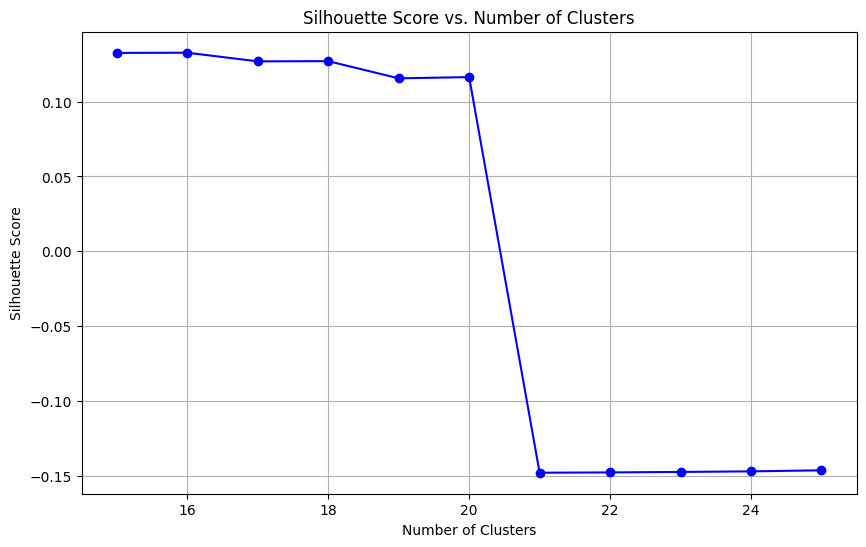

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,normalized_mutual_info_score
from scipy.cluster.hierarchy import linkage
import time
import matplotlib.pyplot as plt

# Train the Doc2Vec model on the cleaned sentences
start = time.time()
# Set values for various parameters
num_features = 100  # Dimensionality of the hidden layer representation
min_word_count = 20  # Minimum word count to keep a word in the vocabulary
context = 5  # Context window size (on each side)
downsampling = 1e-3  # Downsample setting for frequent words

# Convert documents into TaggedDocument format required by Doc2Vec
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(Vocab_v1)]

# Initialize and train the Doc2Vec model
print("Training model...")
doc2vec_model = Doc2Vec(tagged_data, vector_size=num_features, window=context, min_count=min_word_count, workers=4, epochs=20)

# Infer document vectors
doc_vectors = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data]

print('Total time: ' + str((time.time() - start)) + ' secs')

# Print length of word vectors
print(len(doc_vectors))

# Perform hierarchical clustering
linked = linkage(doc_vectors, method='ward')

# Calculate and print silhouette scores for different number of clusters
cluster_range = range(15, 26)  # Adjust range as needed
silhouette_scores = []
nmi_scores = []

for n_clusters in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(doc_vectors)
    silhouette_avg = silhouette_score(doc_vectors, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    #print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")
    # Calculate NMI if ground truth labels are available
    nmi_score = normalized_mutual_info_score(gnd_labels, cluster_labels)
    nmi_scores.append(nmi_score)
    #print(f"For n_clusters = {n_clusters}, the NMI score is: {nmi_score}")


# Print results
for n_clusters, sil_score, nmi_score in zip(cluster_range, silhouette_scores, nmi_scores):
    print(f"K: {n_clusters}, silhouette_score: {sil_score}, NMI score: {nmi_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

**Optimal Clusters**

In [ ]:
import pandas as pd

def hierarchical_clustering(doc_vectors, num_clusters):
    # Perform hierarchical clustering
    linked = linkage(doc_vectors, method='ward')

    # Perform clustering for the specified number of clusters
    clusterer = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(doc_vectors)

    # Create a DataFrame to store cluster labels and document vectors
    df_clusters = pd.DataFrame({'cluster': cluster_labels})
    df_clusters['vector'] = doc_vectors

    # Extract top documents for each cluster
    top_documents = {}
    for cluster_id in range(num_clusters):
        cluster_vectors = df_clusters[df_clusters['cluster'] == cluster_id]['vector']
        cluster_mean_vector = sum(cluster_vectors) / len(cluster_vectors)
        closest_docs = []
        for i, doc_vector in enumerate(doc_vectors):
            similarity = np.dot(cluster_mean_vector, doc_vector) / (np.linalg.norm(cluster_mean_vector) * np.linalg.norm(doc_vector))
            closest_docs.append((i, similarity))
        closest_docs.sort(key=lambda x: x[1], reverse=True)
        top_documents['Cluster #' + str(cluster_id)] = [Vocab_v1[i] for i, _ in closest_docs[:5]]  # Assuming you want top 5 documents

    # Convert lists to strings in the DataFrame
    df_documents = pd.DataFrame(top_documents).applymap(lambda x: ' '.join(x))

    return df_documents

# Specify the number of clusters
num_clusters = 16

# Perform hierarchical clustering and get top documents for each cluster
df_top_documents = hierarchical_clustering(doc_vectors, num_clusters)

# Print the top documents for each cluster
print(df_top_documents)

                                          Cluster #0  \
0              xfree86 support eisa video cards dell   
1                 mjones donald aix kingston ibm com   
2                                  comp graphics faq   
3  2-the-max vesa vl video controller cirus logic...   
4  sale kfc svga monitor 1024x768 28dp non-interl...   

                                          Cluster #1  \
0  forwarded doug griffith magellan project manag...   
1  archive-name space new_probes last-modified da...   
2  archive-name space diff diffs since last faq p...   
3                             sunlight shining ocean   
4  sphinx sphinx user-friendly state-of-the-art i...   

                                          Cluster #2  \
0                       honda mailing list subscribe   
1                                   please subscribe   
2                                     resource issue   
3  article 1993apr27 004240 24401 csi jpl nasa go...   
4                  ubject subscrive please sub